In [1]:
# NAME : Jenittan Jose J B
# Reg.No: 212224240063

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

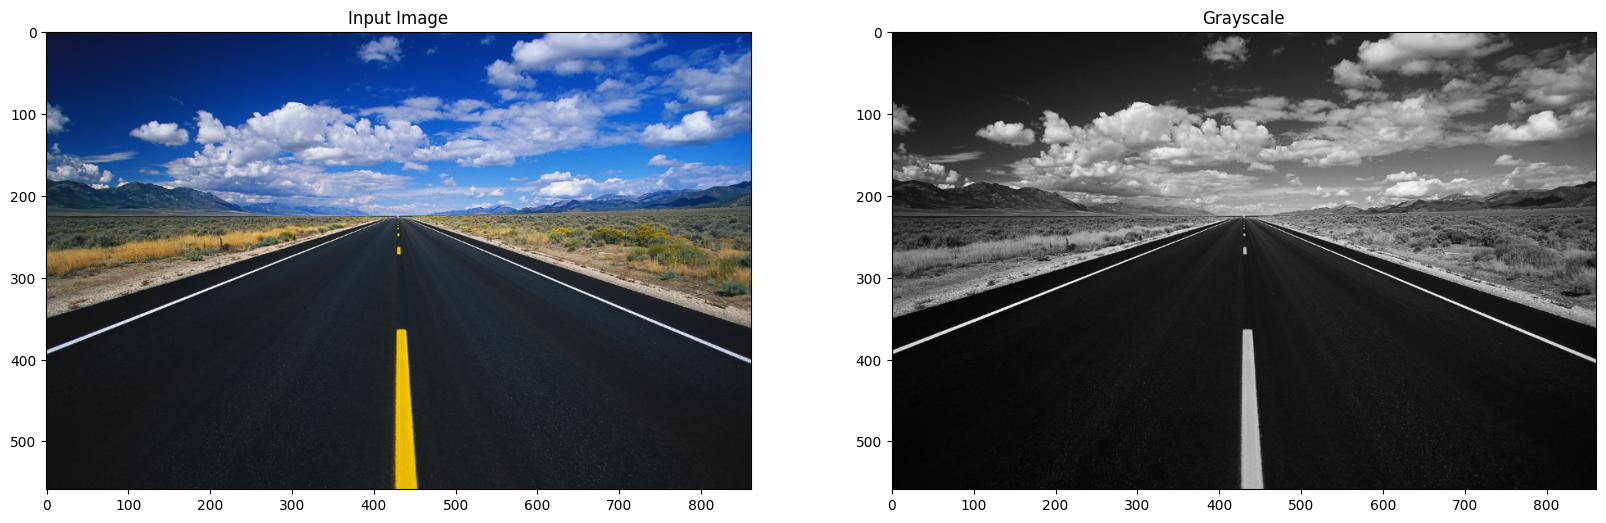

In [3]:
# Reading the image.
img = cv2.imread("Screenshot 2025-11-19 212808.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert to grayscale.
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

#plt.figure(figsize = (15, 10))
plt.figure(figsize = (20, 10))
plt.subplot(1,2,1); plt.imshow(img);plt.title('Input Image');
plt.subplot(1,2,2); plt.imshow(gray, cmap = 'gray');      plt.title('Grayscale');

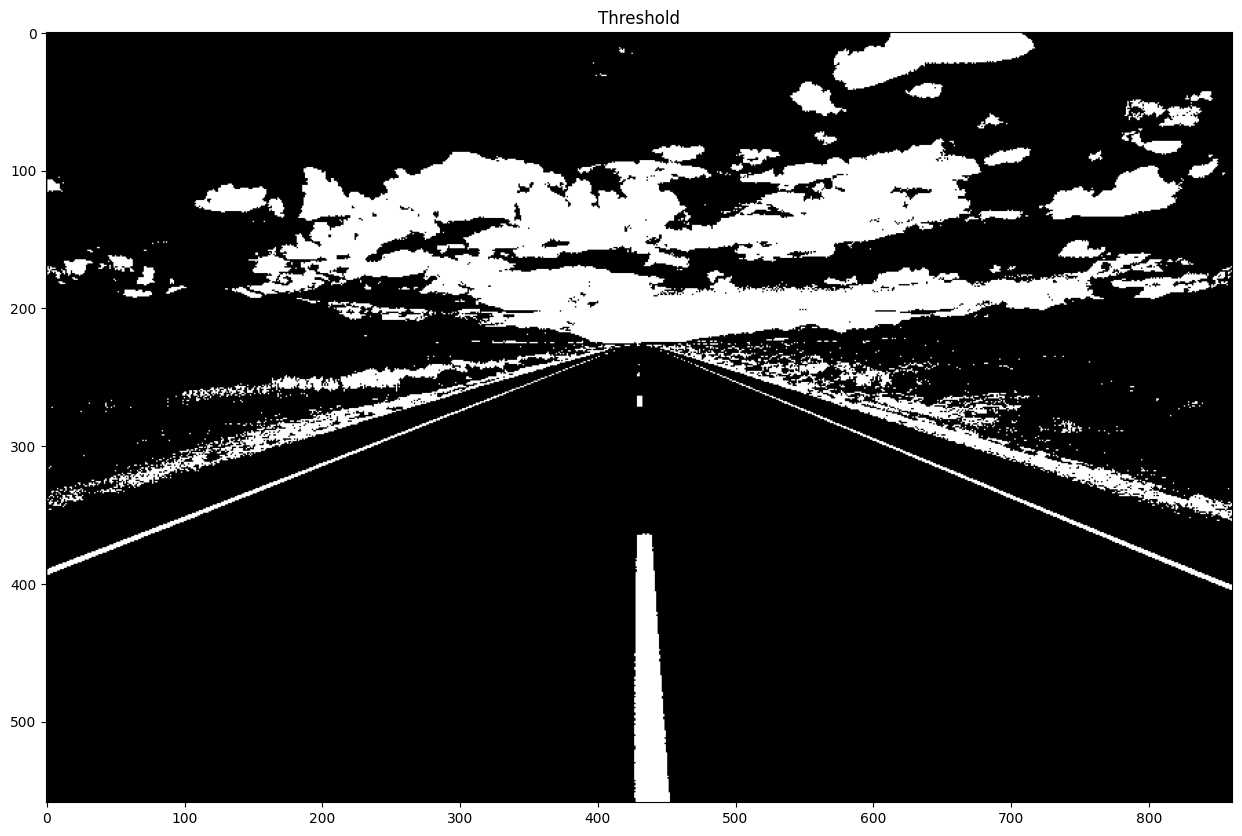

In [4]:

# Use global threshold based on grayscale intensity.
threshold = cv2.inRange(gray, 150, 255)

# Display images.
plt.figure(figsize = (20, 10))
plt.subplot(1,1,1); plt.imshow(threshold, cmap = 'gray'); plt.title('Threshold');

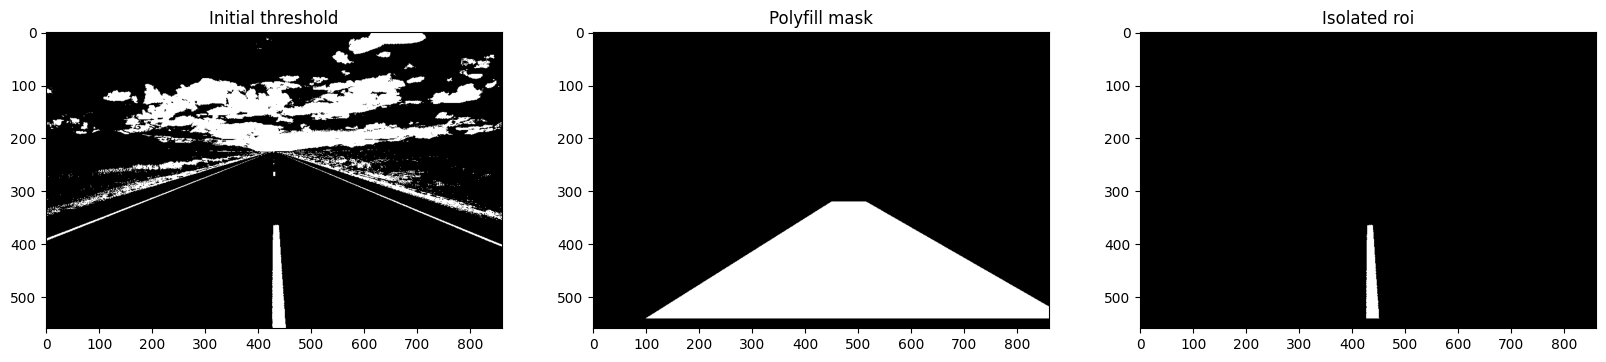

In [5]:
roi_vertices = np.array([[[100, 540],
                          [900, 540],
                          [515, 320],
                          [450, 320]]])

# Defining a blank mask.
mask = np.zeros_like(threshold)   

# Defining a 3 channel or 1 channel color to fill the mask.
if len(threshold.shape) > 2:
    channel_count = threshold.shape[2]  # 3 or 4 depending on the image.
    ignore_mask_color = (255,) * channel_count
else:
    ignore_mask_color = 255

# Filling pixels inside the polygon.
cv2.fillPoly(mask, roi_vertices, ignore_mask_color)

# Constructing the region of interest based on where mask pixels are nonzero.
roi = cv2.bitwise_and(threshold, mask)

# Display images.
plt.figure(figsize = (20, 10))
plt.subplot(1,3,1); plt.imshow(threshold, cmap = 'gray'); plt.title('Initial threshold')
plt.subplot(1,3,2); plt.imshow(mask, cmap = 'gray');      plt.title('Polyfill mask')
plt.subplot(1,3,3); plt.imshow(roi, cmap = 'gray');       plt.title('Isolated roi');